# Setup packages

In [215]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
# from pymer4.models import Lmer
from natsort import natsorted, ns
import glob
import networkx as nx
from scipy.stats import pearsonr

fpath = 'C:/Users/becha/Desktop/Face_meteor_analysis'

## Loading data for analysis

In [26]:
# group_id = pd.read_csv(os.path.join(fpath,"Data",'group_id.csv'))
# pd.set_option('display.max_rows', data.shape[0]+1)
# group_id

In [207]:
# data = pd.read_csv(os.path.join(fpath, "Data", 'preprocessed_data', 'preprocessed_data', "v4",'group_37_v4.csv'))

In [252]:
# data

In [221]:
datalist = natsorted(glob.glob(os.path.join(fpath,'Data', 'preprocessed_data', 'preprocessed_data', "v4","*")))
len(datalist)
print('There are',len(datalist),'groups for v4.')

There are 50 groups for v4.


In [249]:
datall = pd.DataFrame()
for i in range(0,len(datalist)):
    subdata = pd.read_csv(datalist[i])
    datall = datall.append(subdata).reset_index(drop=True)
len(datall)

2000

## Delete round 9 and 10 data within each group

In [272]:
type(datall)
mask1 = datall['round'] != 9
mask2 = datall['round'] != 10
df = datall[mask1 & mask2]
df

,Unnamed: 0,sub_id,origin_sub_No,game_id,game_version,dictator,group_id,round,pgg_share,pgg_receive,pgg_score,dg_ShareTo_p1,dg_ShareTo_p2,dg_ShareTo_p3,dg_ShareTo_p4,dg_RecFrom_p1,dg_RecFrom_p2,dg_RecFrom_p3,dg_RecFrom_p4,dg_score
0,1,Pocu9yWJdtRrhGMiP,1,2oxMgz2b4YFsnqApA,4,1,37,1,100,150,150,6,6,6,6,6,6,6,4,42
1,2,5Epu88Hmg4axw2qgr,2,2oxMgz2b4YFsnqApA,4,0,37,1,35,53,118,6,6,6,6,6,6,6,4,42
2,3,uv2BK9ZjxwSFbjBzD,3,2oxMgz2b4YFsnqApA,4,0,37,1,10,15,105,6,6,6,6,6,6,6,4,42
3,4,2NpkpAjswmFvq3sck,4,2oxMgz2b4YFsnqApA,4,0,37,1,30,45,115,4,4,4,12,6,6,6,12,54
4,5,Pocu9yWJdtRrhGMiP,1,2oxMgz2b4YFsnqApA,4,1,37,2,100,145,145,6,6,6,6,6,6,6,9,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,28,aKcJgziE6pDs4DTZS,4,kfpbkJ5gzzHaGWcSG,4,0,218,7,70,105,135,6,6,6,6,5,5,6,6,43
1988,29,7Ys3cQ8wpQh4Pyy3m,2,kfpbkJ5gzzHaGWcSG,4,1,218,8,100,167,167,9,3,5,7,9,6,5,6,48
1989,30,Ycnz26eH7pZmsYna4,1,kfpbkJ5gzzHaGWcSG,4,0,218,8,70,103,133,6,6,6,6,3,6,4,6,35
1990,31,2EGkYSNfGZJbRpzde,3,kfpbkJ5gzzHaGWcSG,4,0,218,8,65,88,123,5,4,8,7,5,6,8,6,47


# PGG

* Hypothesis: 若該組別在某 round 中出現合作崩解，則那一round中 non-dictator 的 pgg_share 應該較所有組別所有 round 的平均值低。

## The mean & sd of all players' pgg_share

In [299]:
mean_pgg = np.mean(df['pgg_share'])
mean_pgg

61.85125

In [298]:
sd_pgg = np.std(df['pgg_share'])
sd_pgg

31.157729754227923

## for non-dictator

In [318]:
# 寫出每一round的non-dictator的pgg_share。（總共有：8 rounds * 3 non-dictators * 50 groups = 1200）
dat = df[df['dictator'] == 0]
nondic_pgg = dat[["origin_sub_No","game_id","group_id","round","pgg_share"]]
nondic_pgg
# non_dic = df[df['dictator'] == 0]
# mean_ND = np.mean(non_dic['pgg_score'])
# sd_ND = np.std(non_dic['pgg_score'])
# # print(len(non_dic))
# print("The mean of all non-dictator is:", mean_ND)
# print("The sd of all non-dictator is:", sd_ND)

,origin_sub_No,game_id,group_id,round,pgg_share
1,2,2oxMgz2b4YFsnqApA,37,1,35
2,3,2oxMgz2b4YFsnqApA,37,1,10
3,4,2oxMgz2b4YFsnqApA,37,1,30
5,2,2oxMgz2b4YFsnqApA,37,2,50
6,3,2oxMgz2b4YFsnqApA,37,2,30
...,...,...,...,...,...
1986,3,kfpbkJ5gzzHaGWcSG,218,7,55
1987,4,kfpbkJ5gzzHaGWcSG,218,7,70
1989,1,kfpbkJ5gzzHaGWcSG,218,8,70
1990,3,kfpbkJ5gzzHaGWcSG,218,8,65


## Compare non-dictators' pgg_share with the mean of all players' pgg_share

### std*(-1)

In [326]:
# 低於pgg_share的平均值一個標準差
# nondic_pgg < mean_pgg - sd_pgg*1
comp_1 = mean_pgg - sd_pgg*1
mask_1 = nondic_pgg['pgg_share'] < comp_1
collapse_1 = nondic_pgg[mask_1]
v4_collapsed_id_1 = set(collapse_1['game_id'].values)

collapse_1

,origin_sub_No,game_id,group_id,round,pgg_share
2,3,2oxMgz2b4YFsnqApA,37,1,10
3,4,2oxMgz2b4YFsnqApA,37,1,30
6,3,2oxMgz2b4YFsnqApA,37,2,30
41,1,toMPAsFDvH53xxb8Q,38,1,10
42,3,toMPAsFDvH53xxb8Q,38,1,30
...,...,...,...,...,...
1909,1,C89adWDQXpoLYs9XC,215,8,25
1910,2,C89adWDQXpoLYs9XC,215,8,20
1922,3,fGcqurAS7jsyie69q,216,1,30
1923,4,fGcqurAS7jsyie69q,216,1,25


c:\users\becha\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


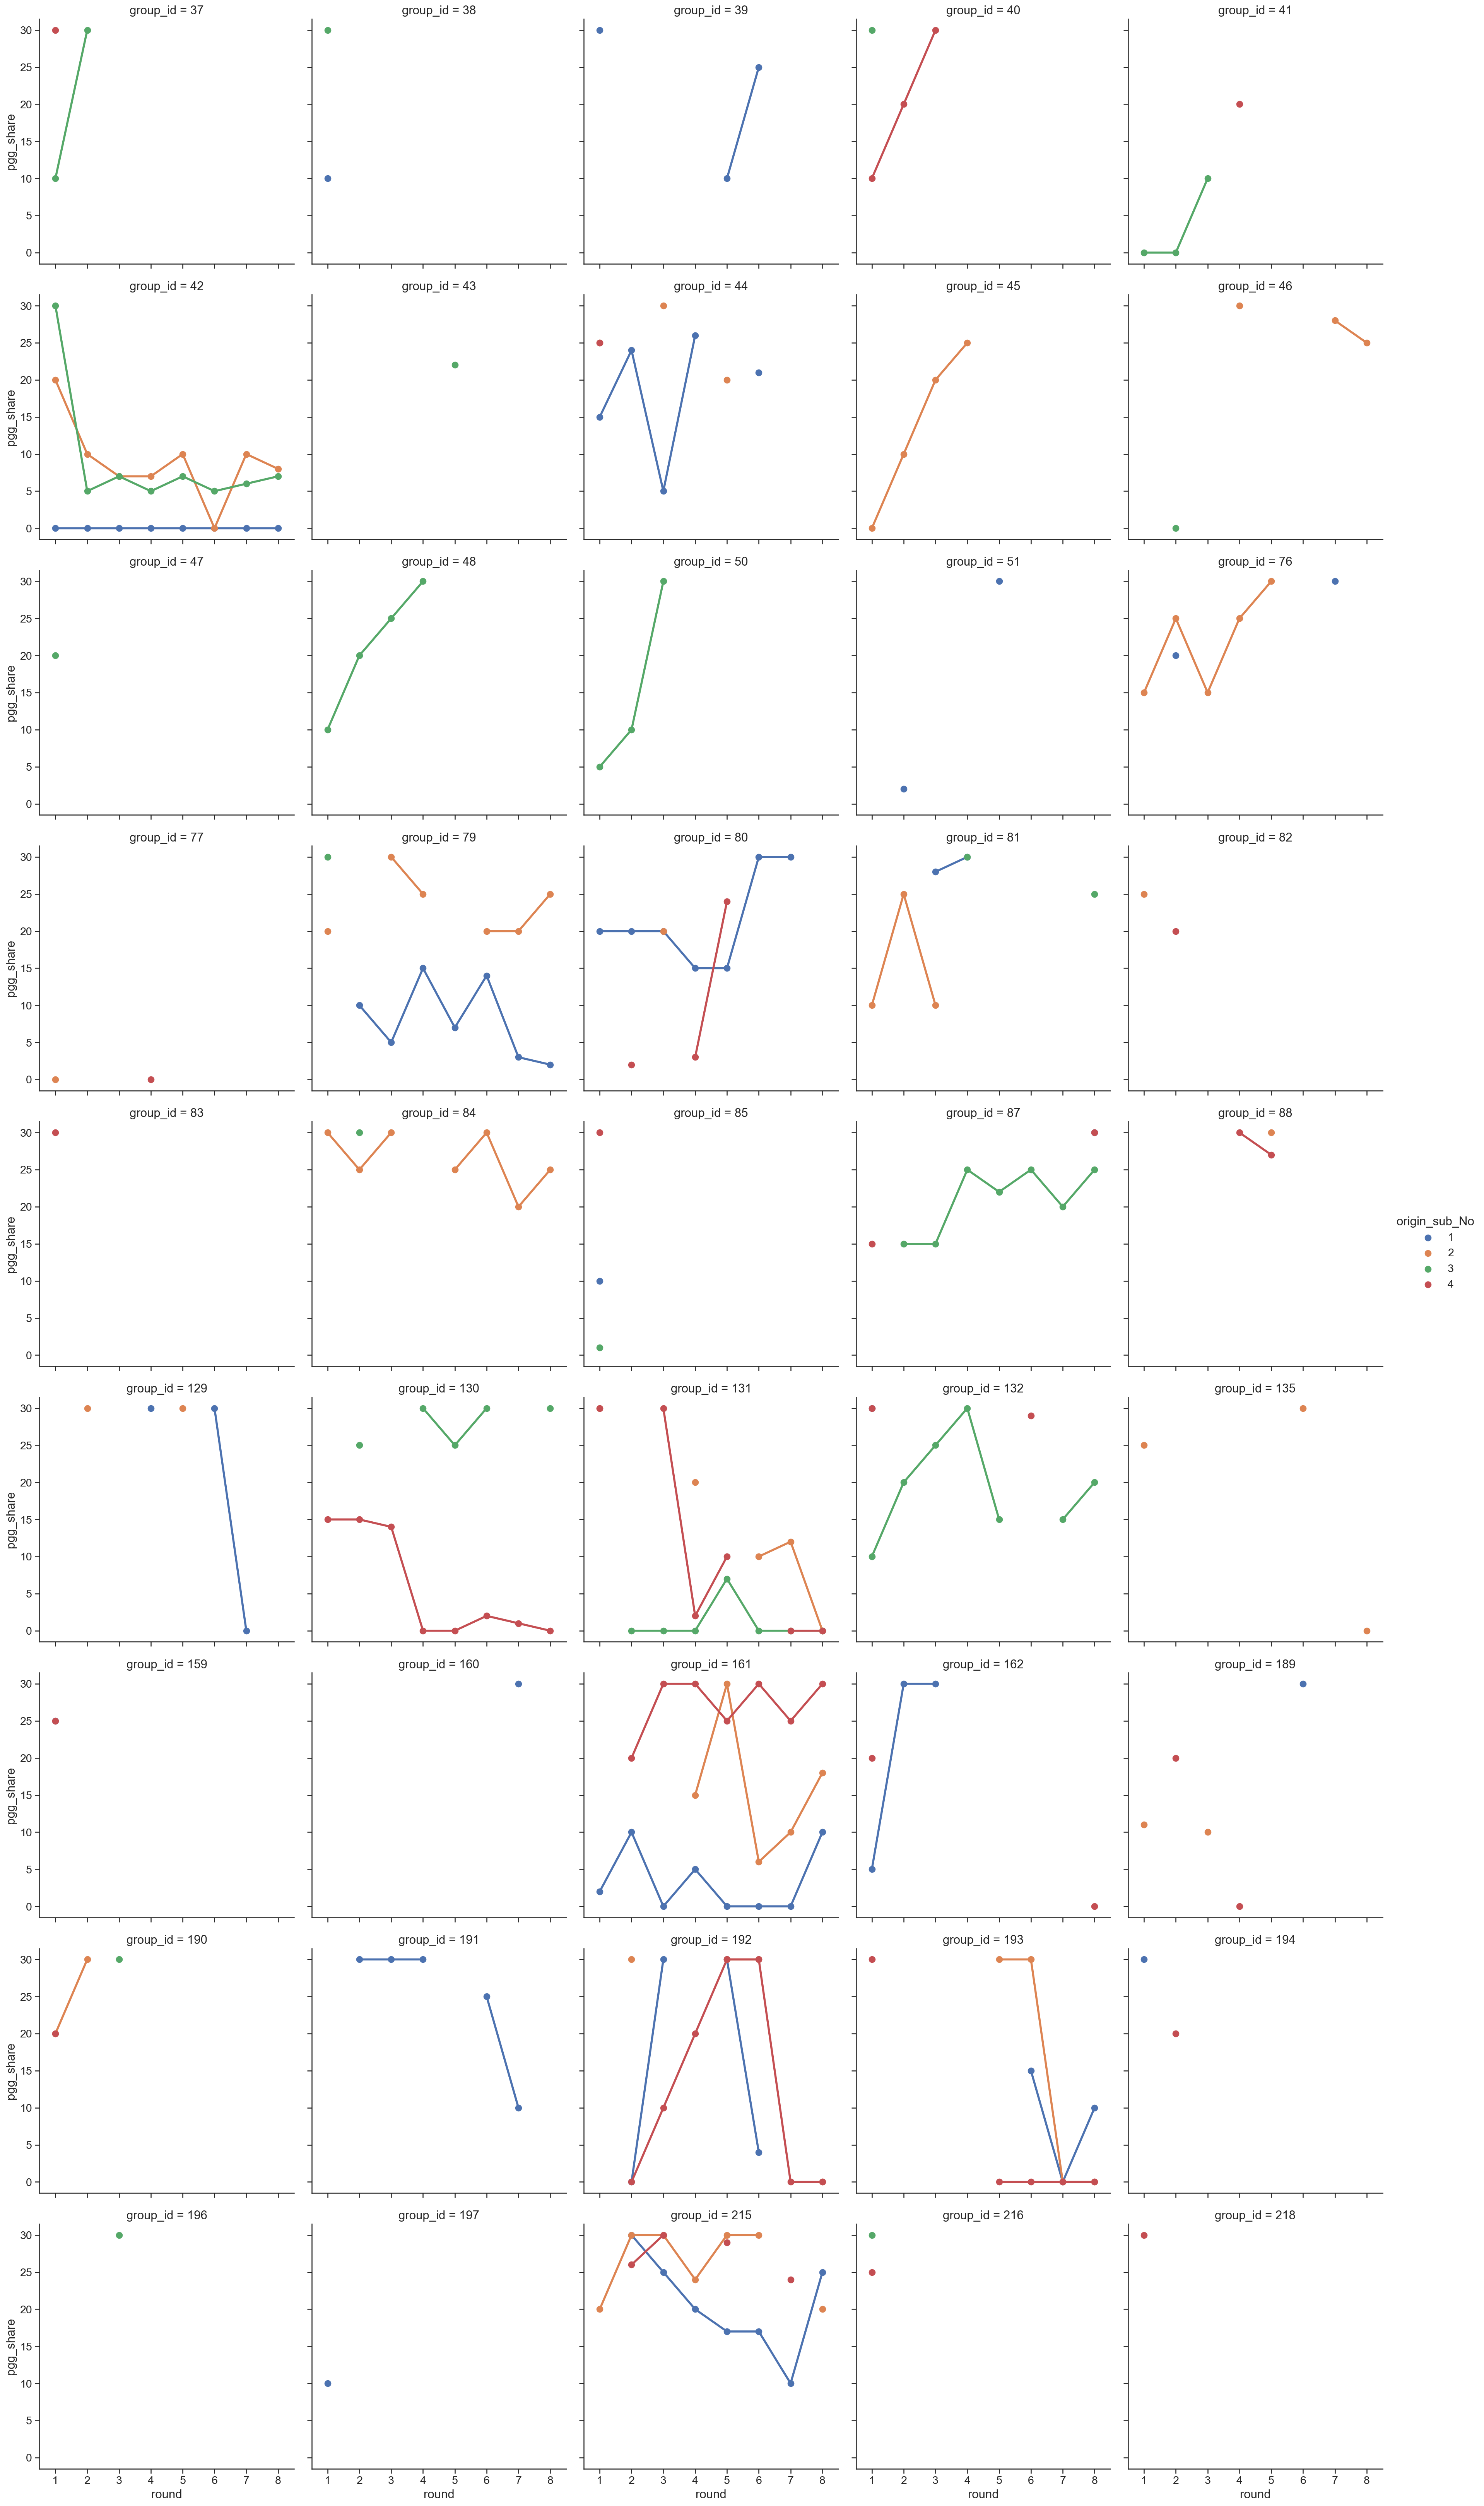

In [327]:
sns.set(style="ticks", font_scale=1.3)
g = sns.factorplot(x="round", y="pgg_share",hue="origin_sub_No",unit='player_id',col_wrap=5, 
                   col='group_id',ci=68, data=collapse_1)

In [365]:
mask1 = nondic_pgg['group_id'] == 42
mask2 = nondic_pgg['group_id'] == 46
mask3 = nondic_pgg['group_id'] == 79
mask4 = nondic_pgg['group_id'] == 80
mask5 = nondic_pgg['group_id'] == 84
mask6 = nondic_pgg['group_id'] == 130
mask7 = nondic_pgg['group_id'] == 131
mask8 = nondic_pgg['group_id'] == 161
mask9 = nondic_pgg['group_id'] == 191
mask10 = nondic_pgg['group_id'] == 192
mask11 = nondic_pgg['group_id'] == 193
mask12 = nondic_pgg['group_id'] == 215
collapse_2 = nondic_pgg[(mask1|mask2|mask3|mask4|mask5|mask6|mask7|mask8|mask9|mask10|mask11|mask12)]

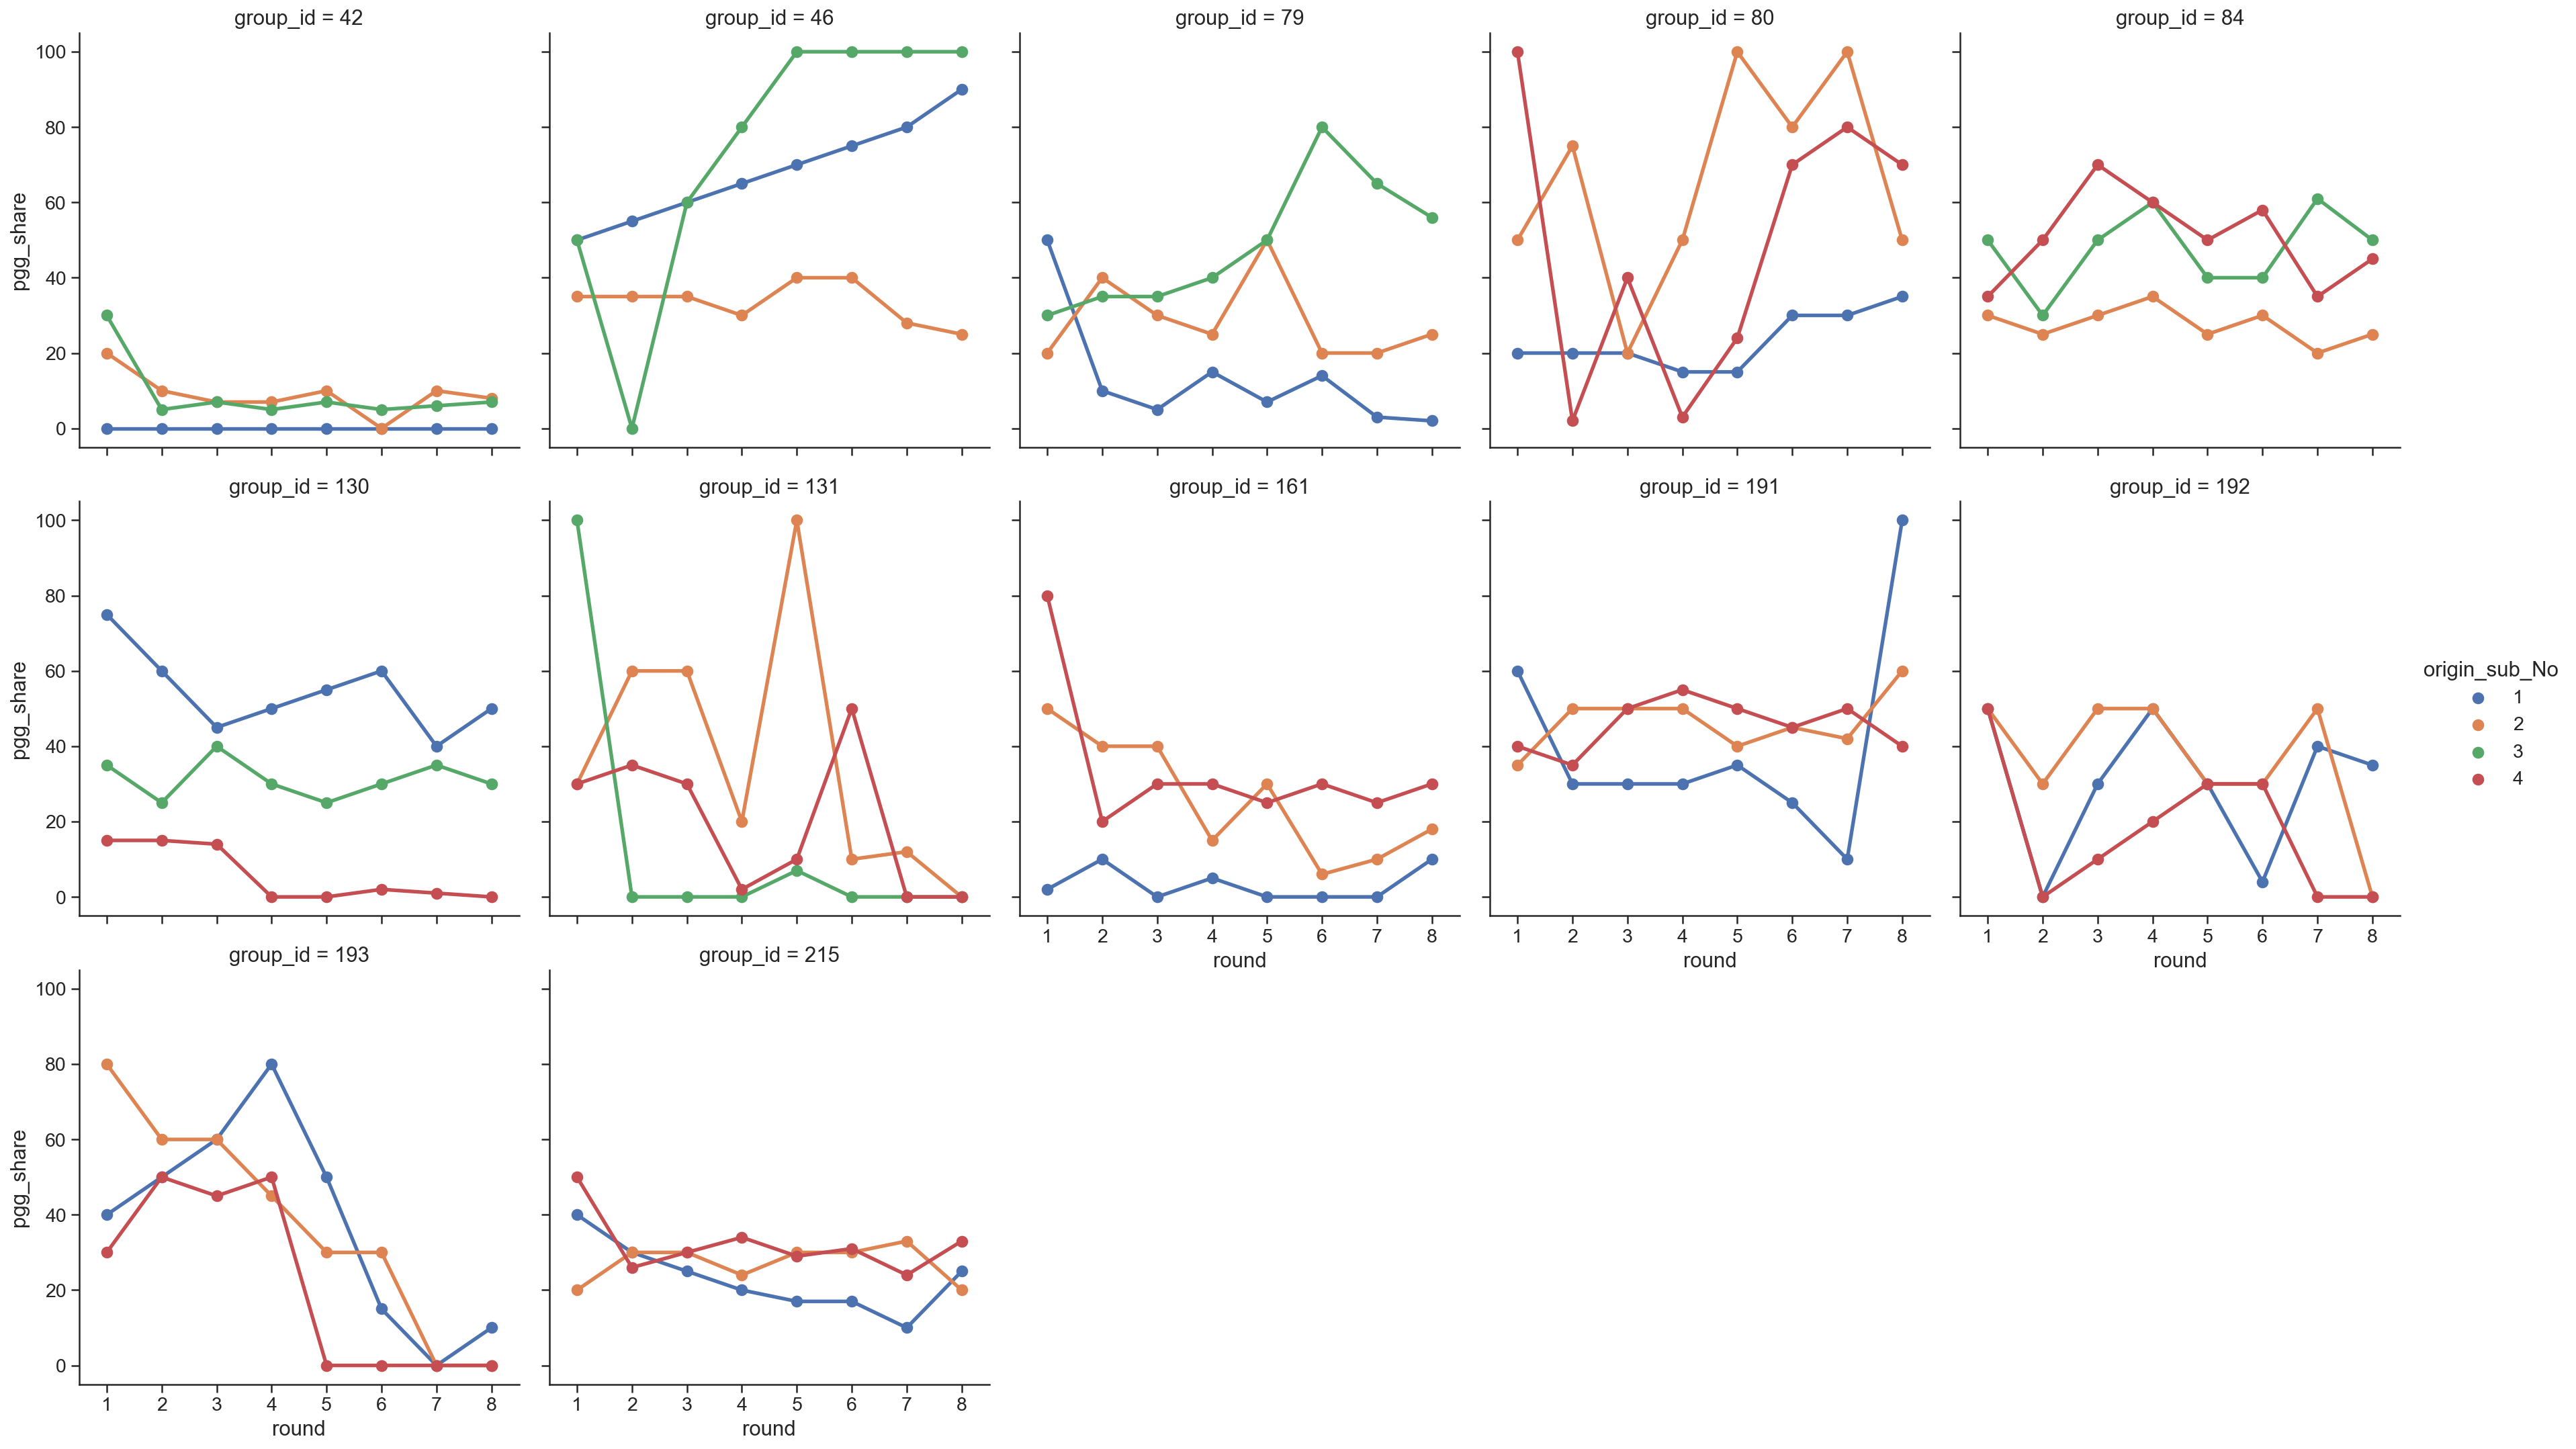

In [366]:
sns.set(style="ticks", font_scale=1.3)
g = sns.factorplot(x="round", y="pgg_share",hue="origin_sub_No",unit='player_id',col_wrap=5, 
                   col='group_id',ci=68, data=collapse_2)

* The corporation-collapsed groups are: 79, 130, 131, 161, 192, 193, 215 

## for dictator

In [273]:
dic = df[df['dictator'] == 1]
mean_Dic = np.mean(dic['pgg_score'])
sd_Dic = np.std(dic['pgg_score'])
# print(len(dic))
print("The mean of all dictator is:", mean_Dic)
print("The sd of all dictator is:", sd_Dic)
print("Two times of sd of all dictator is:", sd_Dic*2)
print("Three times of sd of all dictator is:", sd_Dic*3)
print("Four times of sd of all dictator is:", sd_Dic*4)


The mean of all dictator is: 151.275
The sd of all dictator is: 37.810506145779115
Two times of sd of all dictator is: 75.62101229155823
Three times of sd of all dictator is: 113.43151843733735
Four times of sd of all dictator is: 151.24202458311646


# DG

* Hypothesis: 若該組別在某 round 中出現合作崩解，則那一round中 non-dictator 的 dg_ShareTo_p1 應該較所有組別所有 round 的平均值低。

## The mean & sd of all players' dg_ShareTo_p1

In [368]:
mean_dg = np.mean(df['dg_ShareTo_p1'])
mean_dg

6.125

In [369]:
sd_dg = np.std(df['dg_ShareTo_p1'])
sd_dg

3.3956773992828

##  for non-dictator

In [370]:
# 寫出每一round的non-dictator的dg_ShareTo_p1。（總共有：8 rounds * 3 non-dictators * 50 groups = 1200）
nondic_dg = dat[["origin_sub_No","game_id","group_id","round","dg_ShareTo_p1"]]
nondic_dg

,origin_sub_No,game_id,group_id,round,dg_ShareTo_p1
1,2,2oxMgz2b4YFsnqApA,37,1,6
2,3,2oxMgz2b4YFsnqApA,37,1,6
3,4,2oxMgz2b4YFsnqApA,37,1,4
5,2,2oxMgz2b4YFsnqApA,37,2,6
6,3,2oxMgz2b4YFsnqApA,37,2,6
...,...,...,...,...,...
1986,3,kfpbkJ5gzzHaGWcSG,218,7,5
1987,4,kfpbkJ5gzzHaGWcSG,218,7,6
1989,1,kfpbkJ5gzzHaGWcSG,218,8,6
1990,3,kfpbkJ5gzzHaGWcSG,218,8,5


## Compare non-dictators' dg_ShareTo_p1 with the mean of all players' dg_ShareTo_p1

### std*(-1)

In [373]:
# 低於dg_ShareTo_p1的平均值一個標準差
# nondic_dg < mean_dg - sd_dg*1
comp_2 = mean_dg - sd_dg*1
mask_2 = nondic_dg['dg_ShareTo_p1'] < comp_2
collapse_3 = nondic_dg[mask_2]
v4_collapsed_id_2 = set(collapse_3['game_id'].values)

collapse_3

,origin_sub_No,game_id,group_id,round,dg_ShareTo_p1
11,4,2oxMgz2b4YFsnqApA,37,3,0
42,3,toMPAsFDvH53xxb8Q,38,1,2
62,3,toMPAsFDvH53xxb8Q,38,6,2
85,1,c7yfJKjvpQHx2XH4f,39,2,0
123,4,HidbFzG6Hp4uLD9cQ,40,1,1
162,3,idogHewcJha8WkWgn,41,1,1
166,3,idogHewcJha8WkWgn,41,2,1
170,3,idogHewcJha8WkWgn,41,3,2
174,3,idogHewcJha8WkWgn,41,4,0
178,3,idogHewcJha8WkWgn,41,5,2


In [ ]:
sns.set(style="ticks", font_scale=1.3)
g = sns.factorplot(x="round", y="pgg_share",hue="origin_sub_No",unit='player_id',col_wrap=5, 
                   col='group_id',ci=68, data=collapse_ˇ3)

In [275]:
#Estimate the mean of PGG score for one group.

# lst_round = []
# lst_mean = []

# for i in range(1,11):
#     a = data[data['round']== i]
#     lst_round.append(i)
#     lst_mean.append(np.mean(a['pgg_score']))
    
#     df = pd.DataFrame({'round': lst_round , 'mean': lst_mean})
#     i += 1
# df

In [276]:
# # Estimate the mean & std of PGG score for one group.

# lst_round = []
# lst_class = []
# lst_pggscore = []
# lst_std = []


# for i in range(1,11):
#     a = data[data['round']== i]
#     b = dic_data[dic_data['round'] == i]
#     lst_round.append(i)
#     lst_round.append(i)
#     lst_class.append("group_mean")
#     lst_class.append("dictator")
#     lst_pggscore.append(np.mean(a['pgg_score']))
#     lst_pggscore.append(int(b['pgg_score']))
#     lst_std.append(np.std(a['pgg_score']))
#     lst_std.append('')
#     i += 1

# df = pd.DataFrame({'round': lst_round , 'class': lst_class, 'PGG score': lst_pggscore, 'std':lst_std})
# df

# Visualization

In [367]:
# sns.set(style="ticks", font_scale=1.6)
# sns.factorplot(x="round",y="PGG score",data=df, hue="class", err_style="bars",ci=60, palette="tab10", linewidth=2.5)
